In [57]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.feature_extraction import image
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

from tqdm import tqdm

import warnings
warnings.filterwarnings(action='ignore')

## DATA

In [20]:
path2csv = './SCUT_FBP5500_v2/All_Ratings.xlsx'
df = pd.read_excel(path2csv)
df.tail()

,Rater,Filename,Rating,original Rating
329995,60,AM995.jpg,2,NaN
329996,60,AM996.jpg,2,NaN
329997,60,AM997.jpg,3,NaN
329998,60,AM998.jpg,3,NaN
329999,60,AM999.jpg,2,NaN


In [21]:
x_train = df[df['Filename'].str.contains('AF')]
cond = x_train['Rater'] == 1
x_train = x_train[cond]
x_train.reset_index(inplace=True, drop=True)
x_train

,Rater,Filename,Rating,original Rating
0,1,AF1.jpg,2,NaN
1,1,AF10.jpg,4,NaN
2,1,AF100.jpg,3,NaN
3,1,AF1000.jpg,4,NaN
4,1,AF1001.jpg,5,NaN
...,...,...,...,...
1995,1,AF995.jpg,3,NaN
1996,1,AF996.jpg,3,NaN
1997,1,AF997.jpg,4,NaN
1998,1,AF998.jpg,3,NaN


In [58]:
img_name = list(x_train.iloc[:,1])
img_name[:3]

['AF1.jpg', 'AF10.jpg', 'AF100.jpg']

In [59]:
data = []

for filename in tqdm(img_name):
    image = cv2.imread("./SCUT_FBP5500_v2/Images/"+filename)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (45,45))
        image = image.flatten()
        data.append([image, "./SCUT-FBP5500_v2/Images/"+filename])

100%|█████████████████████████████████████| 2000/2000 [00:01<00:00, 1031.01it/s]


In [60]:
features, images  = zip(*data)

## PCA

In [61]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)
pca_features = pca.transform(features)

In [62]:
num_images_to_plot = len(images)

if len(images) > num_images_to_plot:
    sort_order = sorted(random.sample(range(len(images)), num_images_to_plot))
    images = [images[i] for i in sort_order]
    pca_features = [pca_features[i] for i in sort_order]

## t-SNE

In [63]:
X = np.array(pca_features)
tsne = TSNE(n_components=2, learning_rate=300, perplexity=30, angle=0.2, verbose=2).fit_transform(X)
print(tsne.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.002s...
[t-SNE] Computed neighbors for 2000 samples in 0.268s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 736.268068
[t-SNE] Computed conditional probabilities in 0.056s
[t-SNE] Iteration 50: error = 76.7583008, gradient norm = 0.0891470 (50 iterations in 0.582s)
[t-SNE] Iteration 100: error = 76.0127869, gradient norm = 0.0926531 (50 iterations in 0.496s)
[t-SNE] Iteration 150: error = 76.3876801, gradient norm = 0.0738027 (50 iterations in 0.468s)
[t-SNE] Iteration 200: error = 76.3004913, gradient norm = 0.0822219 (50 iterations in 0.468s)
[t-SNE] Iteration 250: error = 75.9692993, gradient norm = 0.1579597 (50 iterations in 0.515s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.969299
[t-SNE] Iteration 300: error = 1.6749384, gradient norm = 0.0052702 (50 iterations in 0.477

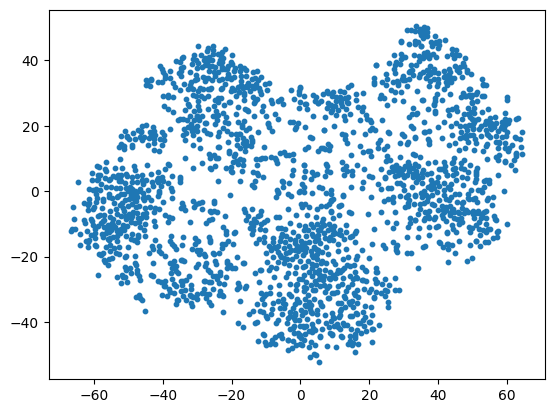

In [65]:
# t-SNE 시각화
xs = tsne[:,0]
ys = tsne[:,1]
plt.scatter(xs,ys, s=10)
plt.show()

## Agglomerative Clustering

cluster label:  [4 0 2 ... 5 5 5]


Text(0, 0.5, 'feature 1')

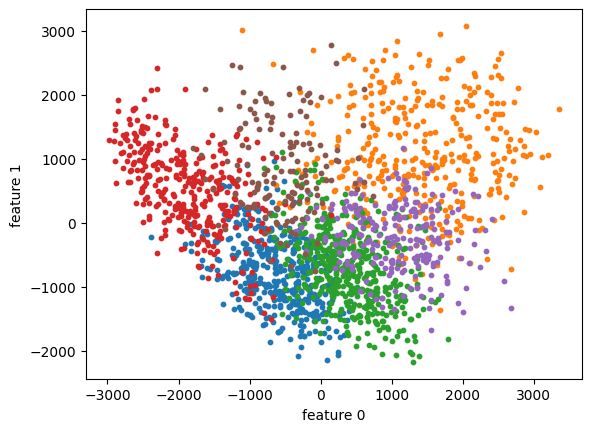

In [66]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
assignment = agg.fit_predict(tsne)
print("cluster label: ", assignment)

plt.scatter(X[assignment == 0, 0], X[assignment == 0, 1],s=10)
plt.scatter(X[assignment == 1, 0], X[assignment == 1, 1],s=10)
plt.scatter(X[assignment == 2, 0], X[assignment == 2, 1],s=10)
plt.scatter(X[assignment == 3, 0], X[assignment == 3, 1],s=10)
plt.scatter(X[assignment == 4, 0], X[assignment == 4, 1],s=10)
plt.scatter(X[assignment == 5, 0], X[assignment == 5, 1],s=10)
plt.xlabel("feature 0")
plt.ylabel("feature 1")